In [1]:
import os

In [2]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Georgia']})
rc('text', usetex=True)

In [3]:
from helper import *
from utils import *
from approximation import *
from plot import *

In [4]:
directory = '/Users/linggeli/monte_carlo/data/array/'
contour_type = 'theta23__dmsq_32_NH'
data_index = 0
contour_dist = np.load(os.path.join(directory, 'dist_{}.npy'.format(contour_type)))
contour_stat = np.load(os.path.join(directory, 'stat_{}.npy'.format(contour_type)))[data_index]

In [5]:
print(contour_dist.shape)
print(contour_stat.shape)

(20, 20, 2000)
(20, 20)


***The grid of p-values is the approximation target and the "true" confidence contours are plotted as reference.***

In [6]:
contour_tile = calculate_percentile_2d(contour_dist, contour_stat)  # p-value at every point

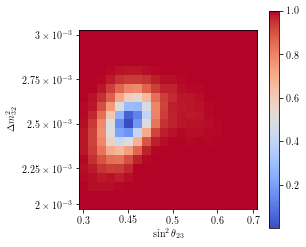

In [7]:
fig = plt.figure(figsize=(4, 4))
im = plt.imshow(np.flip(contour_tile, axis=0), cmap='coolwarm', interpolation='nearest')
plt.colorbar(im)
plot_x_axis(contour_type)
plot_y_axis(contour_type)
plt.show()

***Convert data to (x, y) coordinates in the unit square and each row associates with a point.***

In [10]:
all_points, all_samples = flatten_dist(contour_dist)
all_obs = contour_stat.flatten()

In [11]:
n_mc = 0
total = 20 * 20 * 2000
priority = np.random.uniform(size=400)  # uniform priority means random sampling
sample_size = np.zeros(400)

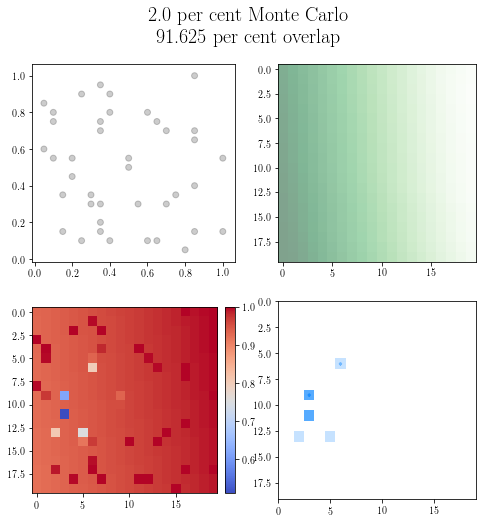

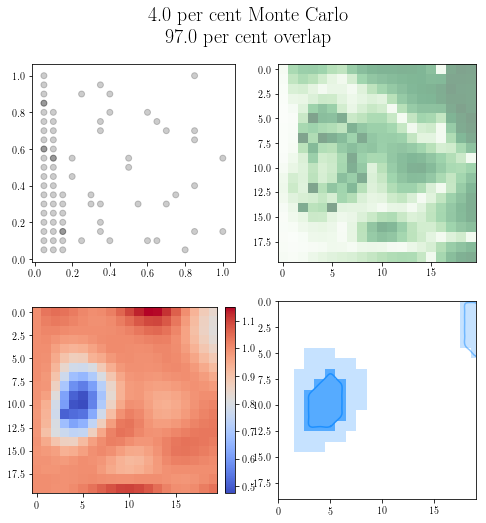

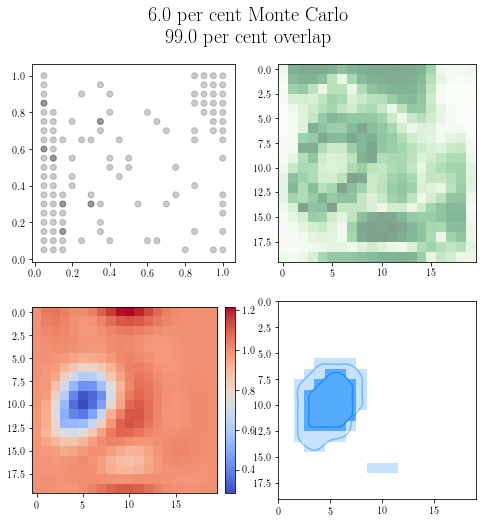

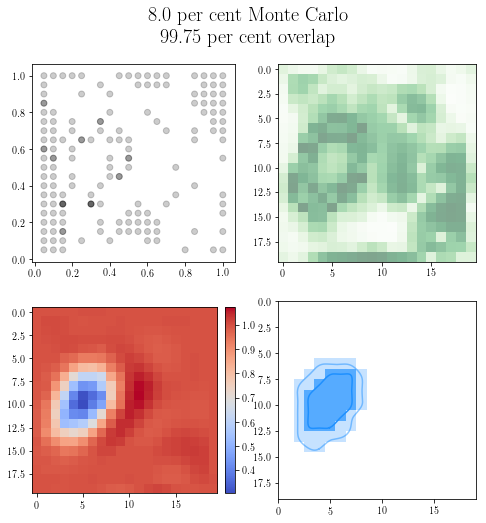

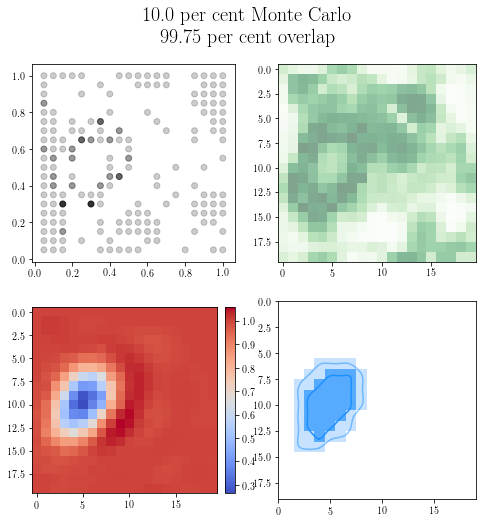

In [12]:
for run in range(5):
    n_mc += 40 * 400
    
    sample_size = expand_sample(priority, sample_size, 40, 400, 2000)
    current_points = get_current_training(all_points, sample_size)
    current_target, current_error = get_current_target(all_samples, all_obs, sample_size)
    hat, std = build_approximation(current_points, current_target, current_error, all_points)
    priority = acquisition_function(hat, std)
    
    hat[sample_size > 0] = current_target  # replace model approximation with sample estimate when possible
    hat_grid = data_to_grid(hat, 20)
    
    overlap = calculate_overlap(hat_grid, contour_tile)
    
    priority_grid = data_to_grid(np.argsort(np.argsort(priority)) * 100.0 / (priority.shape[0] - 1), 20)

    plot_iteration(sample_size, all_points, priority_grid, hat_grid)    
    
    plt.suptitle('{} per cent Monte Carlo\n'.format(n_mc * 100.0 / total) + 
                 '{} per cent overlap'.format(np.round(overlap * 100, 3)), fontsize=20)
    
    #plt.savefig('final{}.png'.format(run), dpi=200)
    plt.show()